<a href="https://colab.research.google.com/github/ishitadatta/S-P-stock-analysis/blob/master/StockS%26P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#essential libraries
import pandas as pd                   #pandas does things with matrixes
import numpy as np                    #used for sorting a matrix
import matplotlib.pyplot as plt       #matplotlib is used for plotting data
import matplotlib.ticker as ticker    #used for changing tick spacing
import datetime as dt                 #used for dates
import matplotlib.dates as mdates     #used for dates, in a different way
import statsmodels.api as sm

In [5]:
#importing dataset
df = pd.read_csv(r"all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# Understanding the Dataset

The first step towards data analysis is to understand the data in hand. Its columns, max, min, count, null values

In [6]:
df.columns                    #prints just the columns of the matrix

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [7]:
df.info()                            #get information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [8]:
df.describe()                        #describe the dataset

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


# Missing values

In this section we will handle all the missing data in the dataset

In [9]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data  

,Total,Percent
date,0,0.000000
close,0,0.000000
volume,0,0.000000
Name,0,0.000000
high,8,0.001292
low,8,0.001292
open,11,0.001777


We observe that the total number of column with missing values is 8-27 which is less that 0.005% of the dataset. It is convinient and a norm to get rid of the rows with missing value since the affect on the dataset will be very insignificant.

In [10]:
df = df.drop(df.loc[df['high'].isnull()].index)                                   #drops rows with a null cell in the high column


Let's check the missing data again

In [11]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrices
missing_data  

,Total,Percent
date,0,0.000000
high,0,0.000000
low,0,0.000000
close,0,0.000000
volume,0,0.000000
Name,0,0.000000
open,3,0.000485


We observe that the total number of missing rows to be 11, making the total number of rows being deleted less than 0.002% of the dataset.

In [12]:
df = df.drop(df.loc[df['open'].isnull()].index)                                   #drops rows with a null cell in the open column
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrices
missing_data

,Total,Percent
date,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0
Name,0,0.0


we have successfully cleared all missing data from our dataset

# Plotting the Data

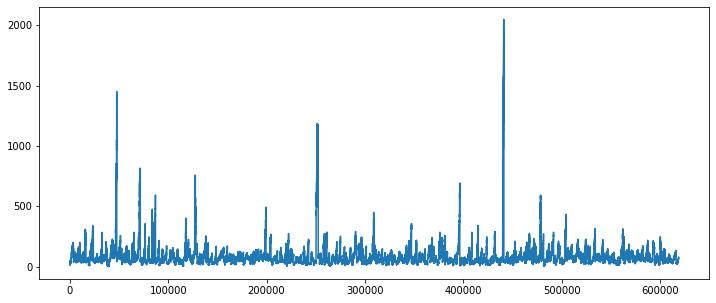

In [13]:
df['close'].plot(figsize=(12,5))

In [32]:
!pip install pmdarima

##### Figuring out Order for Arima model

In [15]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(df['close'], trace=True,
# suppress_warnings=True)
# stepwise_fit.summary()

ModuleNotFoundError: ignored

#### Split Data into Training and Testing

In [16]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(619029, 7)
(618999, 7) (30, 7)


#### Training the model

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['close'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:               618999
Model:                     ARMA(1, 5)   Log Likelihood            -1849078.224
Method:                       css-mle   S.D. of innovations              4.798
Date:                Thu, 29 Oct 2020   AIC                        3698172.449
Time:                        12:11:47   BIC                        3698263.136
Sample:                             0   HQIC                       3698197.896
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          83.0437      4.832     17.186      0.000      73.573      92.515
ar.L1.close     0.9987   6.53e-05   1.53e+04      0.000       0.999       0.999
ma.L1.close     0.0083      0.001      6.502      0.000       0.006       0.011
ma.L2.close    -0.0185      0.001    -14.544      0.000      -0.021      -0.016
ma.L3.close     0.0268      0.001     21.084      0.000       0.024       0.029
ma.L4.close     0.0117      0.001      9.212      0.000       0.009       0.014
ma.L5.close     0.0091      0.001      7.139      0.000       0.007       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           +0.0000j            1.0013            0.0000
MA.1            1.7166           -1.5147j            2.2893           -0.1151
MA.2            1.7166           +1.5147j            2.2893            0.1151
MA.3           -2.5074           -0.0000j            2.5074           -0.5000
MA.4           -1.1047           -2.6705j            2.8900           -0.3124
MA.5           -1.1047           +2.6705j            2.8900            0.3124
-----------------------------------------------------------------------------
"""

#### Making Predictions on Test Set

In [27]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
print(pred)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


618999    72.015506
619000    72.024078
619001    72.023906
619002    72.030499
619003    72.042025
619004    72.056412
619005    72.070779
619006    72.085128
619007    72.099458
619008    72.113769
619009    72.128062
619010    72.142336
619011    72.156591
619012    72.170828
619013    72.185046
619014    72.199245
619015    72.213426
619016    72.227588
619017    72.241732
619018    72.255857
619019    72.269964
619020    72.284053
619021    72.298122
619022    72.312174
619023    72.326207
619024    72.340222
619025    72.354218
619026    72.368197
619027    72.382157
619028    72.396098
Name: ARIMA Predictions, dtype: float64


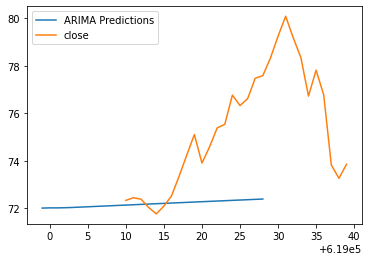

In [28]:
pred.plot(legend=True)
test['close'].plot(legend=True)

In [29]:
test['close'].mean()

75.33466666666666

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['close'].mean()
rmse=sqrt(mean_squared_error(pred,test['close']))
print(rmse)

3.937008252980901


In [31]:
model2=ARIMA(df['close'],order=(1,0,5))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


For Future Prices (predicting for next 30 days)

In [44]:
index_future_price = pd.date_range(start='2018-02-07',end='2018-03-09')
#print(index_future_price)
pred=model2.predict(start=len(df),end=len(df)+30).rename('ARIMA PREDICTIONS')
#print(pred)
pred.index=index_future_price

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


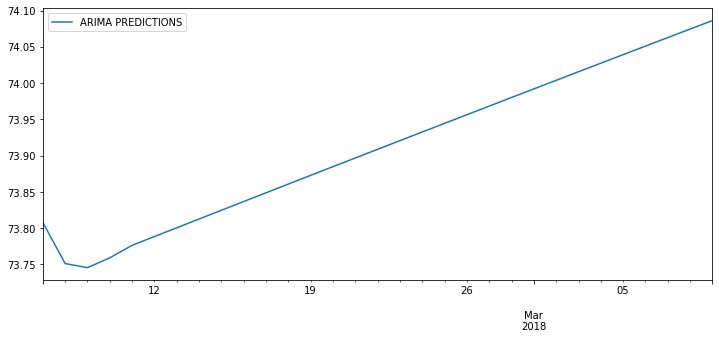

In [45]:
pred.plot(figsize=(12,5),legend=True)